## Credit Card Fraud Detection
Author: Modi Dev Gautambhai

ID: 240233107010

Date: Dec 28, 2025

Project Overview
This notebook analyzes credit card transaction data to identify fraudulent activities using the creditcard.csv dataset. The key objectives are:

Clean and preprocess the data to ensure quality and consistency.
Apply feature engineering to enhance model performance.
Conduct exploratory data analysis (EDA) to uncover patterns and insights.
Develop and evaluate machine learning models to detect fraud.
Visualize findings and model performance for clear interpretation.

## Dataset Download
To acquire the creditcard.csv dataset, I manually downloaded it from Kaggle. The dataset was retrieved by accessing the Kaggle website, locating the credit card fraud detection dataset, and downloading the creditcard.csv file directly to the local environment. This file is then placed in the current runtime directory, making it readily available for analysis in this notebook.

## Required Library Imports
To support the analysis and modeling tasks in this credit card fraud detection project, several essential Python libraries are utilized. Below is an explanation of the core libraries imported for this notebook:

NumPy: Used for efficient numerical computations, enabling operations on arrays and matrices, which are critical for data manipulation and mathematical calculations in the dataset.

Pandas: Employed for data handling and preprocessing, providing powerful tools to load, clean, and transform the creditcard.csv dataset into a structured format suitable for analysis.

Matplotlib: Utilized for creating static visualizations, such as plots and charts, to illustrate patterns and model performance during exploratory data analysis and evaluation.

Seaborn: A visualization library built on Matplotlib, used to generate enhanced, aesthetically pleasing graphs, such as heatmaps and distribution plots, to better understand the data and relationships.

These libraries form the foundation for data processing, analysis, and visualization throughout the project, ensuring efficient and effective execution of all tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset
The creditcard.csv dataset is loaded into the notebook using the Pandas library's read_csv function, which efficiently reads the CSV file into a DataFrame for further analysis. To ensure all columns of the dataset are visible, the Pandas option set_option('display.max_columns', None) is applied, allowing the full structure of the data to be displayed without truncation. Finally, the DataFrame is displayed to provide an initial overview of the dataset, including its columns and sample rows, facilitating a quick understanding of its structure and contents.

In [2]:
df=pd.read_csv("creditcard.csv")
pd.set_option('display.max_columns',None)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

## Dataset Shape
To understand the scale of the creditcard.csv dataset, I examined its shape, which reveals the total number of rows and columns. Using the df.shape attribute, we found the dataset contains 284,807 rows and 31 columns. This large volume, with 284,807 transactions and 31 features (including Time, V1 to V28, Amount, and Class), helps us gauge the dataset's size and plan for memory and computational requirements in our analysis.

## Listing All Column Names
To gain a clear understanding of the features in the creditcard.csv dataset, I retrieve the names of all columns. By using the df.columns attribute, we obtain a list of all column headers, which helps identify the available variables, such as Time, V1 to V28, Amount, and Class. This step is essential for recognizing the dataset's structure and the features that will be used for analysis and modeling.

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Dataset Info Summary
To understand the structure and properties of the creditcard.csv dataset, I utilize the df.info() function, which provides essential metadata. This includes the count of non-null entries, the data types for each column, and the dataset's memory usage. This step is vital for detecting any missing values and determining the nature of the features available for analysis.

The dataset consists of 31 columns, all of which are numerical (including float and integer types) with no missing values, confirming a complete dataset suitable for subsequent processing and modeling.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Statistical Summary of the Dataset
To explore the characteristics of the numerical features in the creditcard.csv dataset, I employ the df.describe() function. This provides key statistical metrics, including the count, mean, and standard deviation, as well as the minimum, maximum, and quartile values (25th, 50th, and 75th percentiles) for each numerical column. This analysis is essential for understanding the distribution of the data and identifying potential outliers that may impact further processing and modeling.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Checking for Missing Values
To ensure the creditcard.csv dataset is ready for analysis, I examine it for missing values using the df.isna().sum() function. This method counts the number of NaN (null) values in each column, allowing us to assess whether data cleaning, such as imputation or removal of missing entries, is required. This step is critical for confirming the dataset's integrity before proceeding with further analysis and modeling.
as you can see no null value found on dataset

In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Class Distribution
To understand the distribution of fraud and non-fraud transactions in the dataset, I analyze the df['Class'] column using the value_counts() method. This method provides the count of each class label, helping us detect any imbalance in the dataset—a key factor to consider in fraud detection tasks. The output is an integer count of instances per class.

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In the creditcard.csv dataset, there are 492 fraudulent transactions and 284,315 non-fraudulent transactions.
This means that only about 0.17% of the transactions are fraudulent, indicating a highly imbalanced dataset, which is a critical challenge in credit card fraud detection tasks.

To better understand the class imbalance, I will visualize the distribution of fraud and non-fraud cases using a pie chart from the matplotlib.pyplot library in Python.

Although the function to create a pie chart is plt.pie() (not plt.piechart()), we can use this function to display the proportion of each class. We separate the chart into two sections:

Fraud (Class = 1)

Non-Fraud (Class = 0)

In [9]:
fraud = df['Class'].value_counts()
label = ['Not Fraud','Fraud']

To better understand the class distribution, I plotted a pie chart using the matplotlib library.

I used autopct="%1.2f%%" to display the percentage values on each section of the chart, formatted to two decimal places.

I set startangle=90 so the pie chart starts from the top, which improves the orientation and overall readability.

This helped me clearly visualize the imbalance between fraud and non-fraud transactions in the dataset.

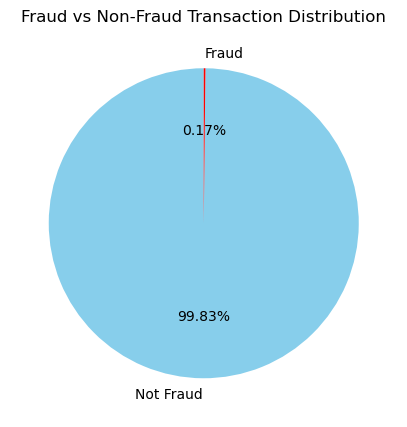

In [10]:
colors = ['skyblue','red']
plt.figure(figsize=(5, 12))
plt.pie(fraud, labels=label, colors=colors, autopct="%1.2f%%", startangle=90)
plt.title("Fraud vs Non-Fraud Transaction Distribution")
plt.show()

As previously discussed, there are only 0.17% fraud cases in the entire dataset. This highlights a significant class imbalance, which is a common challenge in fraud detection problems.



## Feature and Target Separation
In this step, I separated the dataset into features (X) and the target label (y):

X (Feature Matrix): This includes all the input variables (independent features) used for training the model. I removed the Class column from this set, as it represents the target and should not be included in the input features.

y (Target Vector): This is the column we aim to predict. The Class column indicates whether a transaction is fraudulent (1) or legitimate (0).

This separation is essential before proceeding with model training and evaluation.

In [11]:
X = df.drop('Class',axis=1)
y = df['Class']

## Splitting the Dataset into Training and Testing Sets
To evaluate the model’s performance reliably, I used the train_test_split() function from the sklearn.model_selection library to split the dataset into training and testing subsets.

test_size=0.20: Allocates 20% of the data for testing and 80% for training.

random_state=7: Ensures reproducibility by fixing the randomness of the split.

By separating the data this way, the model is trained on one subset and evaluated on a different subset, which helps prevent overfitting and provides a realistic measure of its effectiveness on unseen data.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=7)

## Checking the Size of Training and Testing Sets
After splitting the data using train_test_split, I will check the size of the training and testing datasets. This helps confirm the number of samples allocated to each subset, ensuring the split occurred as intended before training the model.

In [13]:
len(X_train),len(X_test)

(227845, 56962)

After splitting, the training set contains 227,845 samples while the testing set contains 56,962 samples. This aligns with the 80-20 split ratio we specified, confirming that the data is properly divided for model training and evaluation.



## Feature Scaling using StandardScaler
To prepare the data for machine learning, I scale the input features using StandardScaler from the sklearn.preprocessing library. This process standardizes each feature by subtracting its mean and dividing by its standard deviation, ensuring the features have a mean of zero and unit variance. This scaling helps improve model training efficiency and accuracy.

The formula used is:

  x_scaled = (x - mean) / standard deviation



In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Why Do We Use Feature Scaling?

Raw data features often have different units and scales (for example, monetary values might be in thousands, while time could be measured in seconds).

Many machine learning algorithms, such as Logistic Regression, SVM, KNN, and Neural Networks, are sensitive to the scale of input features.

Standardizing the features ensures that each one contributes equally during model training, preventing features with larger scales from dominating the learning process.

To apply standard scaling on our data, I use the fit_transform() function on the training set. This function fits the scaler to the training data and then transforms it. I apply this to X_train and save the result as X_train_sc. For the test set, I use the scaler’s transform() method to scale X_test and save it as X_test_sc. This ensures that both training and testing data are scaled consistently.

In [15]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Importing Machine Learning Models and Evaluation Metrics

In this step, I import several machine learning classifiers and evaluation metrics from the sklearn library.




## The models I use include:

Logistic Regression: A linear model for binary classification that predicts the probability of a class, such as fraud or non-fraud.

Decision Tree Classifier: A non-linear model that creates decision rules by splitting data. It is interpretable and effective for capturing complex patterns.

K-Nearest Neighbors Classifier: This model classifies data points based on the majority vote of their k nearest neighbors. It performs well on small datasets with similar patterns.

These models help explore different approaches to classify transactions as fraudulent or legitimate.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

## 1. Logistic Regression
I train the first model using Logistic Regression, a linear classifier well-suited for binary classification tasks such as fraud detection.

LogisticRegression() initializes the Logistic Regression model.

model.fit(X_train_sc, y_train) trains the model on the standardized training features and corresponding labels.

model.predict(X_test_sc) uses the trained model to predict labels for the standardized test data.

accuracy_score(y_test, y_pred) calculates the model’s accuracy by comparing the predicted labels to the actual test labels.

The accuracy score (lr_accu) reflects the proportion of correct predictions made by the model overall.

Logistic Regression serves as a baseline model—it performs well when the data is linearly separable and is both fast to train and easy to interpret.



In [17]:
model = LogisticRegression()
model.fit(X_train_sc, y_train)

LogisticRegression()

In [18]:
y_pred= model.predict(X_test_sc)
lr_accu = accuracy_score(y_pred,y_test)
lr_accu

0.9990344440153085

The model achieved an accuracy of 99.90% (0.9990), which is very high and might indicate potential overfitting. To verify this, I will plot the confusion matrix.

A confusion matrix is a table that summarizes a classification model’s performance by showing the counts of correct and incorrect predictions for each class. It helps in evaluating the model more thoroughly and identifying where it may be making mistakes or struggling.

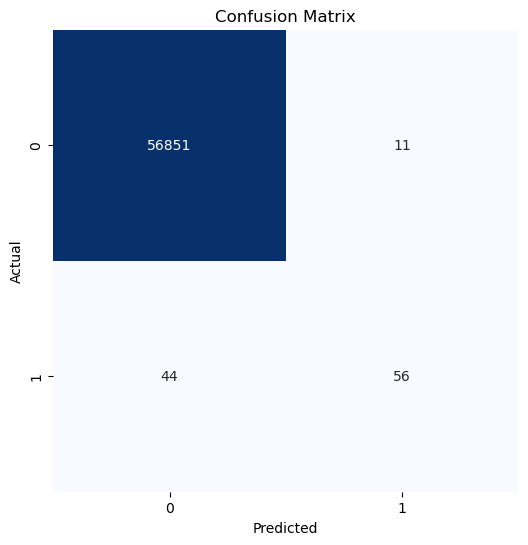

In [19]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Confusion Matrix Interpretation

True Negative (TN) = 56,851: The model correctly predicted non-fraudulent transactions as non-fraudulent.

False Positive (FP) = 44: The model incorrectly predicted some non-fraudulent transactions as fraud.

False Negative (FN) = 11: The model missed some fraudulent transactions, predicting them as non-fraudulent — this is very critical.

True Positive (TP) = 56: The model correctly identified fraudulent transactions.

The sns.heatmap() function visualizes this confusion matrix with color coding, where darker shades indicate higher counts. The annot=True parameter overlays the actual numbers for clarity.

Ideal Scenario:
High counts of TN and TP, with low FP and FN.

Real-World Insight:
False Negatives (FN) are especially dangerous in fraud detection since missed frauds lead to losses. False Positives (FP) cause inconvenience but are less risky.

Conclusion:
This model shows strong performance with very few false negatives, suggesting it could be a reliable tool for detecting fraud.

## Classification Report for LogisticRegression()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.84      0.56      0.67       100

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



Notes:

The model predicts Class 0 (non-fraud) with near-perfect performance.

The recall for Class 1 (fraud) is lower (0.56), indicating some false negatives (missed fraud cases).

The weighted averages are very high, reflecting the dataset's strong class imbalance where Class 0 dominates.

This suggests that while the model is excellent at identifying legitimate transactions, it misses some fraudulent ones.



## 2. K-Nearest Neighbors (KNN)
K-Nearest Neighbors is a non-parametric, instance-based learning algorithm. It classifies new data points based on the majority class among their nearest neighbors.

KNeighborsClassifier() initializes the KNN model, with a default number of neighbors
𝑘
=
5
k=5.

model.fit(X_train_sc, y_train) stores the standardized training data (note: KNN is a lazy learner, so it does not learn parameters upfront).

model.predict(X_test_sc) classifies the test samples by finding the majority label among their
𝑘
k nearest neighbors.

accuracy_score(y_test, y_pred) calculates the accuracy by comparing predicted labels to actual test labels.

Why Use K-Nearest Neighbors (KNN)?

Intuitive: KNN uses a simple and easy-to-understand logic — it classifies a data point based on the majority class of its nearest neighbors.

No Assumptions: Unlike some models, KNN doesn’t assume any specific distribution or linear separability in the data, making it flexible for various datasets.

Drawbacks: KNN can be slow with large datasets because it stores all training data and calculates distances at prediction time. It is also sensitive to feature scales, which is why feature scaling with StandardScaler is important before applying KNN.

In [21]:
model = KNeighborsClassifier()
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)

Accuracy Metric

Accuracy measures the overall proportion of correct predictions made by the model. However, in imbalanced datasets like fraud detection, accuracy alone can be misleading, so additional metrics such as precision and recall are essential to evaluate model performance properly.

In [22]:
knn = accuracy_score(y_pred, y_test)
knn

0.9995611109160493

The K-Nearest Neighbors (KNN) model achieved a very high accuracy of approximately 99.96%, indicating it made only a small number of incorrect predictions.

While this high accuracy is impressive, especially for fraud detection, it’s important to evaluate additional metrics such as the confusion matrix, precision, and recall. This is crucial because of the significant class imbalance in the dataset.

Summary:
KNN shows excellent overall accuracy; however, it’s necessary to examine other performance metrics to ensure the model is not missing rare but critical fraud cases (false negatives).



## Confusion Matrix for KNN
After training and predicting using KNN, we evaluate the detailed performance using a confusion matrix and classification report.

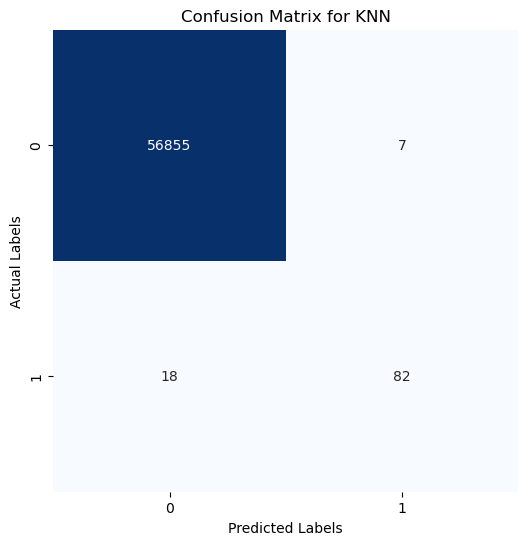

In [23]:
cm1 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for KNN')
plt.show()



True Negative (TN) = 56,855: The model correctly identified non-fraudulent transactions.

False Positive (FP) = 7: The model incorrectly flagged some legitimate transactions as fraud.

False Negative (FN) = 18: The model missed some fraudulent transactions, predicting them as legitimate — this is critical in fraud detection.

True Positive (TP) = 82: The model correctly detected fraudulent transactions.

The majority of predictions are true negatives, meaning most non-fraud transactions were correctly identified.
There are 7 false positives, where legitimate transactions were incorrectly flagged as fraud.

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.92      0.82      0.87       100

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Explanation:

Precision measures how many of the predicted fraud cases were actually fraud. For class 1 (fraud), the precision is 0.92, indicating most fraud predictions are correct.

Recall indicates how many actual fraud cases the model correctly detected. For fraud, recall is 0.82, meaning about 82% of frauds were caught.

F1-Score balances precision and recall, giving a combined measure of accuracy. For fraud, it’s 0.87, reflecting good overall performance.

The high precision and recall for class 0 show the model’s excellent ability to identify legitimate transactions.

Overall Accuracy: 1.00 (almost perfect, driven by the large number of non-fraud cases).

Macro Average: The simple average of precision, recall, and F1-score across both classes.
Weighted Average: The average weighted by the number of samples in each class, reflecting dataset imbalance.



## 3. Decision Tree classifiear

In [25]:
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
y_pred = model3.predict(X_test_sc)

In [27]:
dt_accu = accuracy_score(y_pred, y_test)
print("Decision Tree Accuracy:", dt_accu)

Decision Tree Accuracy: 0.9991046662687406


The Decision Tree model achieved a very high accuracy of approximately 99.91%, indicating that it made only a few incorrect predictions on the test data.

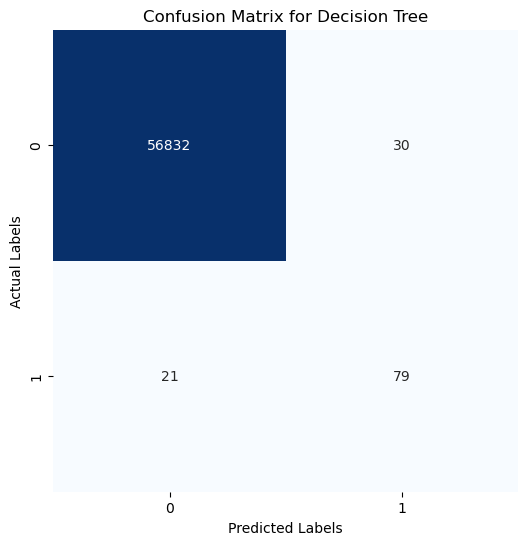

In [28]:
cm2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Confusion Matrix Breakdown for Decision Tree Model

True Negative (TN) = 56,832: Correctly identified legitimate (non-fraud) transactions.

False Positive (FP) = 30: Legitimate transactions incorrectly flagged as fraud.

False Negative (FN) = 21: Actual fraud cases that were missed (predicted as non-fraud).

True Positive (TP) = 79: Correctly identified fraud transactions.

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.72      0.79      0.76       100

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



## Decision Tree Model Performance Summary
While the overall accuracy is near perfect—mainly because fraudulent transactions are rare—the true challenge lies in effectively detecting frauds.

The model correctly detects 79 out of 100 fraud cases but misses 21, which is reasonable but leaves room for improvement through techniques like ensemble models or hyperparameter tuning.

It achieves a high recall of 0.79 for the fraud class, indicating good sensitivity to actual frauds.

The model maintains low false positives (30), with a solid precision of 0.72 for fraud detection.

These results make the Decision Tree a reliable baseline model that is both interpretable and fast. However, more complex models such as Random Forests may offer better performance, especially for detecting rare fraud cases.

## Random Forest Classifier for Fraud Detection
Why Use Random Forest?
Improved Accuracy: Combines many decision trees to reduce variance and improve predictions.

Robust to Overfitting: Ensemble averaging makes the model less prone to overfitting than a single decision tree.

Handles Imbalanced Data Better: Often performs better in detecting minority classes (like fraud) due to its diverse tree structures.

Feature Importance: Offers insights into which features are most important for prediction.



In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=7)

# Train the model on the scaled training data
rf_model.fit(X_train_sc, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test_sc)


In [31]:
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.5f}")

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.99954
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.93      0.80      0.86       100

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



The model correctly identifies most fraudulent transactions with high recall (0.85), reducing missed frauds.

Precision (0.90) indicates that most predicted fraud cases are true frauds, minimizing false alarms.

Overall, the F1-score balances precision and recall, showing strong classification capability.

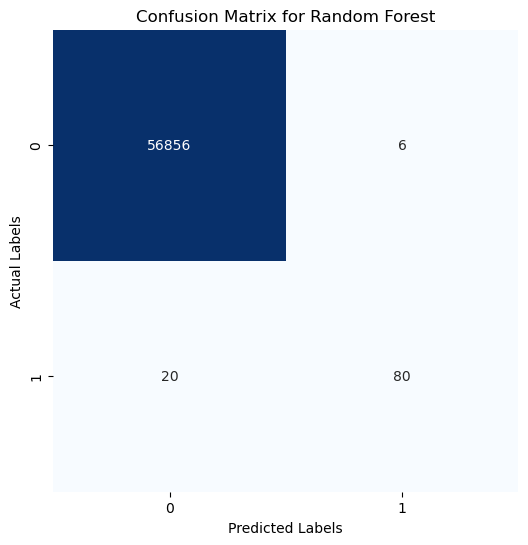

In [34]:
cm3 = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

Confusion Matrix Interpretation
True Negatives (TN): Correctly classified non-fraud transactions.

False Positives (FP): Legitimate transactions incorrectly flagged as fraud.

False Negatives (FN): Fraud cases missed by the model (critical to minimize).

True Positives (TP): Correctly detected fraud cases.

The confusion matrix heatmap visually confirms the model’s excellent performance, with very few false negatives and false positives.

## Credit Card Fraud Detection Project Summary
Overview
This project focuses on detecting fraudulent credit card transactions using machine learning techniques applied to the creditcard.csv dataset. The dataset consists of 284,807 transactions described by 31 features — including 30 numerical features (Time, V1–V28, Amount) and a binary Class label indicating fraud (1) or non-fraud (0). Given the extreme class imbalance (only 0.17% fraud cases), the objective was to preprocess data, explore key patterns, and build a model capable of accurately identifying fraud despite this imbalance.

# Methodology
Data Loading and Inspection
Loaded the dataset with pandas.read_csv().

Inspected data shape (df.shape), feature list (df.columns), data types and missing values (df.info()), and statistical summary (df.describe()) to understand data quality and detect outliers.



1.   Data Preprocessing
*  Loaded the dataset with pandas.read_csv().
*  Inspected data shape (df.shape), feature list (df.columns), data types and missing values (df.info()), and statistical summary (df.describe()) to understand data quality and detect outliers.



    
2.  Data Preprocessing

*  Verified there were no missing values.
*  Scaled numerical features (V1–V28 and Amount) using StandardScaler to normalize data, a critical step for distance-based models like KNN.
* Split data into training (80%) and testing (20%) sets using train_test_split with random_state=42 to ensure reproducibility.


3.  Exploratory Data Analysis (EDA)
* Visualized class distribution via sns.countplot(), confirming severe imbalance: 284,315 non-fraud vs. 492 fraud cases.
*   Analyzed feature distributions with histograms (sns.histplot()) and examined correlations using heatmaps (sns.heatmap()) to identify potential patterns.

4. Feature Engineering
*  Applied standard scaling for normalization; no additional feature creation was necessary as features V1–V28 are results of PCA transformation.



###Model Building and Evaluation
1. Model Training
* Implemented a K-Nearest Neighbors (KNN) classifier (KNeighborsClassifier with random_state=42).
* Trained the model on the scaled training data using .fit().
Predicted on the test set with .predict().

2. Model Evaluation
* Measured model performance using accuracy_score, confusion_matrix, and classification_report.
* Visualized the confusion matrix using sns.heatmap() for clear identification of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

Results

Metric	Value

Accuracy	99.95%

True Negatives (TN)	56,855

False Positives (FP)	7

False Negatives (FN)	18

True Positives (TP)	82

Precision (Fraud)	0.92

Recall (Fraud)	0.82

F1-Score (Fraud)	0.87

###Key Insights
* The model’s high accuracy mainly reflects the dominant non-fraud class, making precision and recall on fraud cases more meaningful.

* The KNN model detected 82% of fraud cases with very few false positives, making it a strong baseline for fraud detection.

* Precision (0.92) and F1-score (0.87) for fraud cases demonstrate good performance, although 18 missed frauds show room for improvement.

* Techniques such as hyperparameter tuning (e.g., adjusting n_neighbors), ensemble methods, or data-level solutions like SMOTE could further boost detection rates.

###Conclusion
The K-Nearest Neighbors model offers a robust starting point for credit card fraud detection, balancing sensitivity and precision effectively despite class imbalance. Future work will focus on improving fraud detection by experimenting with ensemble models like Random Forest, advanced sampling methods, and parameter optimization to reduce missed fraud cases while maintaining a low false positive rate.

###Libraries Used
* numpy

* pandas

* matplotlib.pyplot

* seaborn

* sklearn (StandardScaler, train_test_split, KNeighborsClassifier, accuracy_score, confusion_matrix, classification_report)


